## Import Toxicity Dataset

In [4]:
import pandas as pd 
import numpy as np

def load_dataset():
  path = 'offenseval-gr-training-v1/offenseval-gr-training-v1.tsv'
  df = pd.read_csv(path, delimiter='\t', header=0, usecols=['id', 'tweet', 'subtask_a'])

  x = df['tweet'].to_numpy()
  y = df['subtask_a'].apply(lambda value:1 if value == 'OFF' else 0).to_numpy()

  path_test = 'offenseval-gr-testsetv1/offenseval-gr-test-v1.tsv'
  path_labels = 'offenseval-gr-testsetv1/offenseval-gr-labela-v1.csv'

  df_test = pd.read_csv(path_test, delimiter='\t', header=0, usecols=['id', 'tweet'])
  df_labels = pd.read_csv(path_labels , names=['id', 'subtask_a'])


  df_test = df_test.merge(df_labels, on='id')
  del df_labels

  x_test = df_test['tweet'].to_numpy()
  y_test = df_test['subtask_a'].apply(lambda value:1 if value == 'OFF' else 0).to_numpy()

  return(x, y, x_test, y_test)

x, y, x_test, y_test = load_dataset()

In [6]:
# find how balanced is the train - test dataset

total_train_examples = x.size
total_test_examples = x_test.size

off_train_examples = np.count_nonzero(y)
off_test_examples = np.count_nonzero(y_test)

not_off_train_examples = total_train_examples - off_train_examples
not_off_test_examples = total_test_examples - off_test_examples

2486 6257


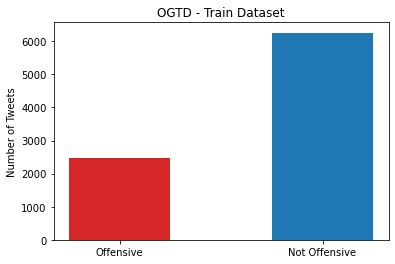

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

tabs = ['Offensive', 'Not Offensive']
counts = [off_train_examples, not_off_train_examples]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(tabs, counts, color=bar_colors, width=0.5, bottom=None, align='center')


ax.set_ylabel('Number of Tweets')
ax.set_title('OGTD - Train Dataset')

plt.show()

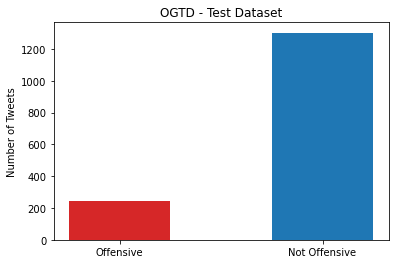

In [9]:
fig, ax = plt.subplots()

tabs = ['Offensive', 'Not Offensive']
counts = [off_test_examples, not_off_test_examples]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(tabs, counts, color=bar_colors, width=0.5, bottom=None, align='center')


ax.set_ylabel('Number of Tweets')
ax.set_title('OGTD - Test Dataset')

plt.show()